<a href="https://colab.research.google.com/github/FauzanArrizal/Analisis-Kompleksitas-Algoritma/blob/main/Tubes-AKA/TUBES_AKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA KELOMPOK**

- Arif Mulya (2311110017)
- Fauzan Arrizal (2311110021)

In [ ]:
# Library
import pandas as pd
import time
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [ ]:
# Read dataset dari file CSV
def load_data(filename):
    df = pd.read_csv(filename)
    return df

In [ ]:
# Implementasi QuickSort - versi rekursif
def quicksort_recursive(arr, key='Age'):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr.iloc[0][key]
        left = pd.DataFrame(columns=arr.columns)
        right = pd.DataFrame(columns=arr.columns)

        # Pisahkan data yang lebih kecil ke kiri, yang lebih besar ke kanan
        for i in range(1, len(arr)):
            if arr.iloc[i][key] <= pivot:
                left = pd.concat([left, arr.iloc[[i]]])
            else:
                right = pd.concat([right, arr.iloc[[i]]])

        # Gabungkan lagi datanya secara rekursif
        return pd.concat([quicksort_recursive(left, key),
                         arr.iloc[[0]],
                         quicksort_recursive(right, key)])

In [ ]:
# Implementasi ShellSort - versi iteratif
def shellsort_iterative(arr, key='Age'):
    df = arr.copy()
    n = len(df)
    gap = n // 2

    while gap > 0:
      # Mengurutkan menggunakan interval gap
        for i in range(gap, n):
            temp = df.iloc[i].copy()
            j = i

            # Menggeser hingga posisi tepat
            while j >= gap and df.iloc[j - gap][key] > temp[key]:
                df.iloc[j] = df.iloc[j - gap]
                j -= gap

            df.iloc[j] = temp
        gap //= 2

    return df

In [ ]:
# Kelas buat nganalisis performa algoritma
class AlgorithmAnalyzer:
    def __init__(self):
        self.sizes = []
        self.quicksort_times = []
        self.shellsort_times = []

    def analyze_algorithms(self, df, max_size=1000, step=100):
        for size in range(step, min(len(df), max_size) + 1, step):
            sample_data = df.sample(n=size)

            start_time = time.time()
            quicksort_recursive(sample_data)
            quicksort_time = time.time() - start_time

            start_time = time.time()
            shellsort_iterative(sample_data)
            shellsort_time = time.time() - start_time

            self.sizes.append(size)
            self.quicksort_times.append(quicksort_time)
            self.shellsort_times.append(shellsort_time)

    def plot_results(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.sizes, self.quicksort_times, 'b-o', label='QuickSort (Rekursif)')
        plt.plot(self.sizes, self.shellsort_times, 'r-o', label='ShellSort (Iteratif)')
        plt.title('Perbandingan Kecepatan: QuickSort vs ShellSort')
        plt.xlabel('Ukuran Input (n)')
        plt.ylabel('Waktu Eksekusi (detik)')
        plt.legend()
        plt.grid(True)
        plt.show()

    def print_statistics(self):
        table = PrettyTable()
        table.field_names = ["Ukuran Input", "Waktu QuickSort (dtk)", "Waktu ShellSort (dtk)"]

        for i in range(len(self.sizes)):
            table.add_row([
                self.sizes[i],
                f"{self.quicksort_times[i]:.6f}",
                f"{self.shellsort_times[i]:.6f}"
            ])

        print("\nHasil Perbandingan Algoritma:")
        print(table)

        avg_quicksort = sum(self.quicksort_times) / len(self.quicksort_times)
        avg_shellsort = sum(self.shellsort_times) / len(self.shellsort_times)

        print(f"\nRata-rata Waktu Eksekusi:")
        print(f"QuickSort: {avg_quicksort:.6f} detik")
        print(f"ShellSort: {avg_shellsort:.6f} detik")
        print(f"Selisih Waktu: {abs(avg_quicksort - avg_shellsort):.6f} detik")

In [ ]:
# Fungsi untuk analisis data yang sudah diurutkan
def analyze_sorted_data(df):
    country_col = 'Country'
    sex_col = 'Sex' if 'Sex' in df.columns else 'Gender'

    stats = {
        'Total Penumpang': len(df),
        'Rata-rata Usia': df['Age'].mean(),
        'Median Usia': df['Age'].median(),
        'Rentang Usia': f"{df['Age'].min()} - {df['Age'].max()}",
        'Distribusi Negara': df[country_col].value_counts().to_dict(),
        'Distribusi Gender': df[sex_col].value_counts().to_dict(),
        'Distribusi Kategori': df['Category'].value_counts().to_dict()
    }

    if 'Survived' in df.columns:
        stats['Distribusi Survived'] = df['Survived'].value_counts().to_dict()

    return stats

In [ ]:
# Print hasil analisis data
def print_analysis_results(stats):
    print("\nHasil Analisis Data:")
    print("-" * 50)
    print(f"Total Penumpang: {stats['Total Penumpang']}")
    print(f"Rata-rata Usia: {stats['Rata-rata Usia']:.2f}")
    print(f"Median Usia: {stats['Median Usia']}")
    print(f"Rentang Usia: {stats['Rentang Usia']}")

    print("\nDistribusi Negara Asal:")
    for country, count in stats['Distribusi Negara'].items():
        print(f"  {country}: {count}")

    print("\nDistribusi Gender:")
    for gender, count in stats['Distribusi Gender'].items():
        print(f"  {gender}: {count}")

    print("\nDistribusi Kategori:")
    for category, count in stats['Distribusi Kategori'].items():
        print(f"  {category}: {count}")

    if 'Distribusi Survived' in stats:
        print("\nDistribusi Survived:")
        for status, count in stats['Distribusi Survived'].items():
            label = "Tidak Selamat" if status == 0 else "Selamat"
            print(f"  {label} ({status}): {count}")

Unggah dataset Anda (format: .csv)...


Saving estonia-passenger-list.csv to estonia-passenger-list (5).csv
Dataset estonia-passenger-list (5).csv berhasil diunggah!
Membaca dataset...
Menganalisis performa algoritma...


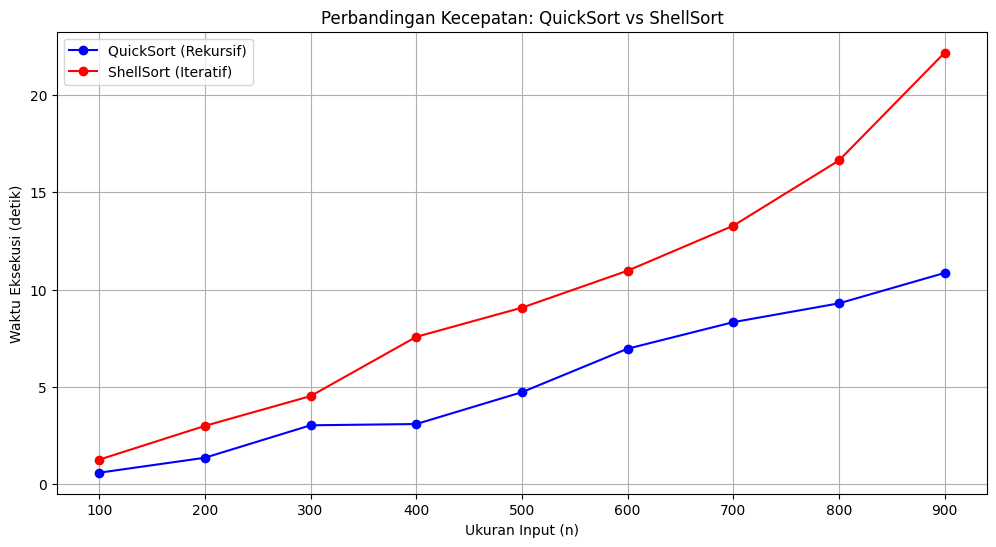


Hasil Perbandingan Algoritma:
+--------------+-----------------------+-----------------------+
| Ukuran Input | Waktu QuickSort (dtk) | Waktu ShellSort (dtk) |
+--------------+-----------------------+-----------------------+
|     100      |        0.580564       |        1.251774       |
|     200      |        1.350833       |        2.989627       |
|     300      |        3.019956       |        4.521000       |
|     400      |        3.083848       |        7.567941       |
|     500      |        4.721073       |        9.068341       |
|     600      |        6.958538       |       10.969972       |
|     700      |        8.323864       |       13.283562       |
|     800      |        9.291335       |       16.639142       |
|     900      |       10.855422       |       22.181175       |
+--------------+-----------------------+-----------------------+

Rata-rata Waktu Eksekusi:
QuickSort: 5.353937 detik
ShellSort: 9.830282 detik
Selisih Waktu: 4.476345 detik

Menganalisis d

In [ ]:
def main():
    try:
        from google.colab import files
        print("Unggah dataset Anda (format: .csv)...")
        uploaded = files.upload()

        # Ambil nama file pertama yang diunggah
        filename = list(uploaded.keys())[0]
        print(f"Dataset {filename} berhasil diunggah!")

        # Load dataset
        print("Membaca dataset...")
        df = load_data(filename)

        # Bikin objek analyzer
        analyzer = AlgorithmAnalyzer()

        # Analisis
        print("Menganalisis performa algoritma...")
        analyzer.analyze_algorithms(df)

        # Hasil
        analyzer.plot_results()
        analyzer.print_statistics()

        # Analisis data yang sudah urut
        print("\nMenganalisis data penumpang...")
        sorted_df = shellsort_iterative(df)  # ShellSort
        stats = analyze_sorted_data(sorted_df)
        print_analysis_results(stats)

    except Exception as e:
        print(f"Waduh error nih: {str(e)}")

if __name__ == "__main__":
    main()